# Hoja de trabajo 06
*Redes neuronales*

*Diego Morales | Alejandro Azurdia*

# Resolución de la hoja de trabajo

## 1) Análisis de Escalabilidad del Modelo

### 1. Cambie el número de observaciones a 100,000. Explique qué es lo que ocurre en términos de:

**1. El tiempo de ejecución para resolver el problemas**
**El tiempo de ejecución para resolver porblemas ha crecido considerablemente. Multiplicandose en algunas instancias mas de 10 veces. 

**2. El resultado final vs lo encontrado en clase: es igual, o diferente...¿porqué?**
Aunque no es igual porque el ploteo es de muchos mas puntos, es parecido al resultado obtenido en clase y el comportamiento exhibido es parecido. 

Esto se evidencia la analizar los resultaods de los pesos y el sesgo:

- pesos: [[ 2.00026532] [-2.99934318]]
- segos: [4.32473635]



**3. Las gráficas para representar los datos/resultados**
Las gráficas están iguales, aunque tienen muchos mas datos. En específico las gráfica para resultados están mucho mas pobladas, pero se comportan de la misma forma. 

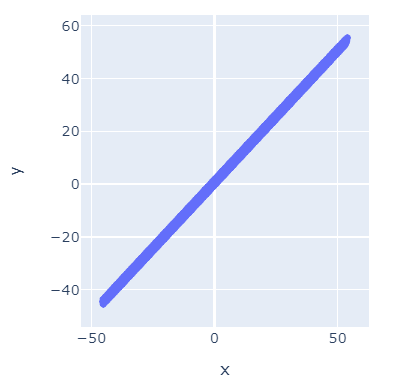

### 2) Cambie el número de observaciones a 1,000,000. Explique qué es lo que ocurre en términos de:

**1. El tiempo de ejecución para resolver el problemas**
El tiempo de ejecución para resolver problemas se multiplicó aun mas que la vez pasada. Para obtener el resultado final, el tiempo de ejecución es de 5 segundos y el entrenamiento es de 4.1 segundos. Este tiempo es casi 10 veces más alto que el encontrado anteriormente. Esto tiene sentido, pues eran 10 veces más observaciones. 

**2. El resultado final vs lo encontrado en clase: es igual, o diferente...¿porqué?**
El resultado sigue siendo igual, aunque aún mas poblado de datos. 

**3. Las gráficas para representar los datos/resultados**
Las gráficas siguen representando el comportamiento esperado, de una recta a 45° sobre el eje. 
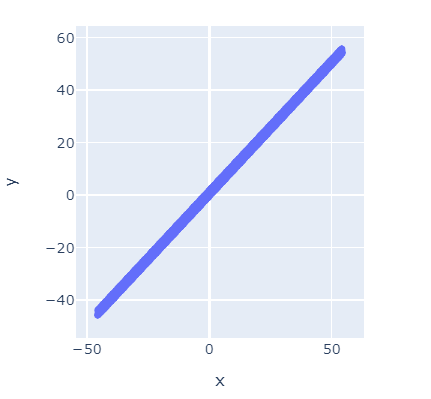

## Experimentación con la Tasa de Aprendizaje (Total: 25 puntos)

**1. ¿Qué ocurre con el tiempo de ejecución?**
Se observó que entre más pequeña se hacía la tasa de aprendizaje, más tiempo era requerido para encontrar le resultado. 

**2. ¿Qué ocurre con la minimización de la pérdida?**
Se observa que entre menor es la tasa de crecimiento, menor es el valor de la diferencia entre iteraciones de la pérdida. Al acercarse a valores cercanos al 0, lo que antes claramente exhibía un comportamiento exponencial, se convierte casi en una recta .

**3. ¿Qué ocurre con los pesos y los sesgos?**
Tanto los pesos como los sesgos no se ajustan correctamente al comportamiento esperado. Los pesos sufren modificaciones relativamente leves, mientras que el sesgo está completamente errado. Se espera un valor de 5 y se obtiene un valor de 0.39. 

**4. ¿Qué ocurre con las iteraciones?**
Las iteraciones no sufren modificaciones. El tiempo de ejecución también es el mismo. 

**5. ¿El problema queda resuelto o no?**
El problema parece quedar resuelto ya que se aprecia una recta 45° como resultado del ploteo, aún con el desajuste de los sesgos, sin embargo un análisis mas profundo es requerido para confirmar este resultado. 

**¿Cuál es la apariencia de la última gráfica? ¿Se cumple con la condición de que sea de 45 grados?**
Sí, se cumple la condición de que esté a 45°. 